# Jungho John Ro Homework 4 WeatherPy
----

### Analysis
* It's not surprising to see that Max Temperature is higher when closer to the equator, however the cities in the southern hemisphere seem to have higher max temps than the northern hemisphere (December Solstice).   
* There is a cluster of cities that have a 100% humidity that lie between a latitude -20 and 10. 
* For cloudiness it is interesting to see majority of the cities lie in 4 major categories: 0%, 20%, 40%, and right around 80%. 

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Creating Dataframe to store results needed for scatter plots
cities_df = pd.DataFrame({"Cities":cities})

# Creating Columns for the data needed in Dataframe
cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Wind Speed"]= ""

cities_df.head()

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,caravelas,,,,,,,,
1,severo-kurilsk,,,,,,,,
2,yellowknife,,,,,,,,
3,sao joao da barra,,,,,,,,
4,port hardy,,,,,,,,


In [4]:
# Print the Start of the Log of data
print("Beginning Data Retrieval")
print("--------------------------")

# The 
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

for index, row in cities_df.iterrows():
    city = row['Cities']
    cities = str(city)
    weather_url = base_url + "&appid=" + api_key + "&q=" + cities
    city_weather = requests.get(weather_url).json()
    try:
        cities_df.loc[index, "Cloudiness"] = city_weather["clouds"]["all"]
        cities_df.loc[index, "Country"] = city_weather["sys"]["country"]
        cities_df.loc[index, "Date"] =  city_weather["dt"]
        cities_df.loc[index, "Humidity"] = city_weather["main"]["humidity"]
        cities_df.loc[index, "Lat"] = city_weather["coord"]["lat"]
        cities_df.loc[index, "Lng"] = city_weather["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = city_weather["main"]["temp_max"]
        cities_df.loc[index, "Wind Speed"] = city_weather["wind"]["speed"]
        print(f'Processing Record | {city}')
    except:
        print("City not found. Skipping...")

print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")

Beginning Data Retrieval
--------------------------
Processing Record | caravelas
Processing Record | severo-kurilsk
Processing Record | yellowknife
Processing Record | sao joao da barra
Processing Record | port hardy
Processing Record | punta arenas
Processing Record | cape town
Processing Record | lebu
Processing Record | albany
Processing Record | robe
Processing Record | delmas
Processing Record | makakilo city
Processing Record | atuona
Processing Record | bluff
Processing Record | mawlaik
Processing Record | ushuaia
Processing Record | abu dhabi
Processing Record | fortuna
Processing Record | verkhnyaya inta
Processing Record | kilindoni
City not found. Skipping...
Processing Record | kaitangata
Processing Record | nikolskoye
Processing Record | rikitea
Processing Record | quatre cocos
Processing Record | port alfred
Processing Record | vaini
Processing Record | puerto ayora
Processing Record | san quintin
Processing Record | penarroya-pueblonuevo
Processing Record | bandarbeyla


Processing Record | faanui
Processing Record | roma
Processing Record | narrabri
Processing Record | gravdal
Processing Record | knyaze-volkonskoye
Processing Record | chiang khong
Processing Record | correntina
Processing Record | springfield
City not found. Skipping...
Processing Record | imeni poliny osipenko
Processing Record | kodiak
Processing Record | kacuni
City not found. Skipping...
Processing Record | manicore
Processing Record | nyurba
Processing Record | belgrade
City not found. Skipping...
Processing Record | saint-pierre
Processing Record | bethel
Processing Record | pevek
Processing Record | saskylakh
Processing Record | yumen
Processing Record | constitucion
Processing Record | gobabis
Processing Record | arraial do cabo
Processing Record | luderitz
Processing Record | voh
Processing Record | sorland
Processing Record | port antonio
Processing Record | morros
Processing Record | memaliaj
Processing Record | radishchevo
Processing Record | evensk
City not found. Skippin

Processing Record | gladstone
Processing Record | cabedelo
Processing Record | eenhana
Processing Record | kalabo
Processing Record | ghauspur
Processing Record | egvekinot
Processing Record | mastic beach
Processing Record | halol
Processing Record | calamar
Processing Record | mayumba
Processing Record | jinka
City not found. Skipping...
Processing Record | ambilobe
Processing Record | bowen
Processing Record | youghal
Processing Record | loughrea
City not found. Skipping...
Processing Record | lapua
Processing Record | kruisfontein
Processing Record | padang
Processing Record | ormara
Processing Record | sao gabriel da cachoeira
Processing Record | kijang
Processing Record | buraydah
Processing Record | tapes
Processing Record | arjawinangun
City not found. Skipping...
Processing Record | jian
Processing Record | bakaly
Processing Record | launceston
Processing Record | kommunisticheskiy
Processing Record | henties bay
Processing Record | lavra
Processing Record | panjakent
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_df.to_csv('cities.csv')

cities_df.count()

Cities        623
Cloudiness    623
Country       623
Date          623
Humidity      623
Lat           623
Lng           623
Max Temp      623
Wind Speed    623
dtype: int64

In [6]:
cities_df.head()

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,caravelas,12,BR,1554324358,100,-17.73,-39.27,81.27,9.42
1,severo-kurilsk,88,RU,1554324405,97,50.68,156.12,33.03,6.85
2,yellowknife,20,CA,1554324125,54,62.45,-114.38,7,11.41
3,sao joao da barra,20,BR,1554321600,65,-21.64,-41.05,82.4,11.41
4,port hardy,90,CA,1554321600,81,50.7,-127.42,50,4.7


In [7]:
cities_df["Cloudiness"] = pd.to_numeric(cities_df["Cloudiness"])
cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"])
cities_df["Lat"] = pd.to_numeric(cities_df["Lat"])
cities_df["Max Temp"] = pd.to_numeric(cities_df["Max Temp"])
cities_df["Wind Speed"] = pd.to_numeric(cities_df["Wind Speed"])

cities_df.dtypes

Cities         object
Cloudiness    float64
Country        object
Date           object
Humidity      float64
Lat           float64
Lng            object
Max Temp      float64
Wind Speed    float64
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

/Users/junghoro/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


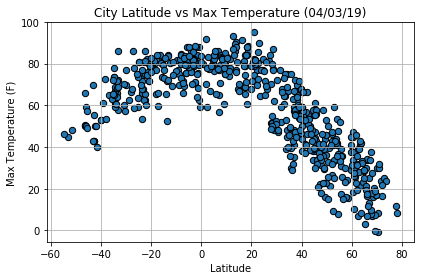

In [8]:
cities_df.plot(kind="scatter", x="Lat", y="Max Temp", 
               s=40, grid="True", edgecolors="black")
plt.title("City Latitude vs Max Temperature (04/03/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.show()

#### Latitude vs. Humidity Plot

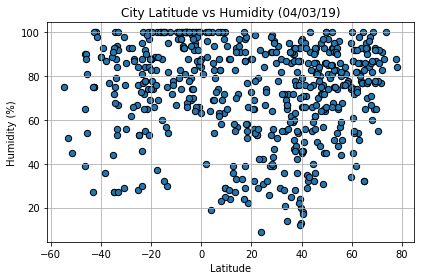

In [9]:
cities_df.plot(kind="scatter", x="Lat", y="Humidity", 
               s=40, grid="True", edgecolors="black")
plt.title("City Latitude vs Humidity (04/03/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.show()

#### Latitude vs. Cloudiness Plot

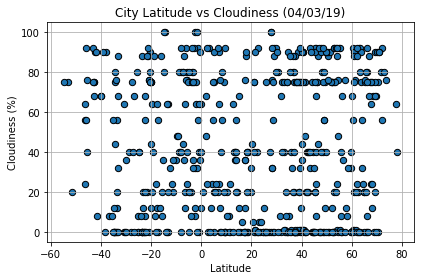

In [10]:
cities_df.plot(kind="scatter", x="Lat", y="Cloudiness", 
               s=40, grid="True", edgecolors="black")
plt.title("City Latitude vs Cloudiness (04/03/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.show()

#### Latitude vs. Wind Speed Plot

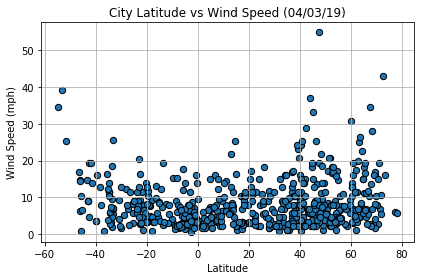

In [11]:
cities_df.plot(kind="scatter", x="Lat", y="Wind Speed", 
               s=40, grid="True", edgecolors="black")
plt.title("City Latitude vs Wind Speed (04/03/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.show()